### Conversão para Yolo

In [39]:
import os

# Diretório contendo as anotações no formato "nome_da_classe esquerda superior direita inferior"
labels_dir = "../../Data/google/Label"
# Diretório de saída para os arquivos YOLO
output_dir = "../../Data/google/LabelYolo"

# Verifica se o diretório de saída existe, se não, cria-o
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Classe a ser atribuída às anotações (no formato YOLO, geralmente começa em 0)
classe = 0

# Largura e altura da imagem (substitua pelos valores reais)
largura_imagem = 1920
altura_imagem = 1080

# Lista todos os arquivos no diretório de anotações
files = os.listdir(labels_dir)

for filename in files:
    # Verifica se o arquivo é um arquivo de anotação (por extensão)
    if filename.lower().endswith('.txt'):
        # Lê o conteúdo do arquivo de anotação original
        label_path = os.path.join(labels_dir, filename)
        with open(label_path, "r") as label_file:
            content = label_file.readline().split()

        # Extrai as coordenadas do formato "nome_da_classe esquerda superior direita inferior"
        nome_da_classe, esquerda, superior, direita, inferior = content
        esquerda, superior, direita, inferior = map(float, [esquerda, superior, direita, inferior])

        # Calcula as coordenadas no formato YOLO
        largura = direita - esquerda
        altura = inferior - superior
        x_centro = (esquerda + (largura / 2)) / largura_imagem
        y_centro = (superior + (altura / 2)) / altura_imagem
        largura /= largura_imagem
        altura /= altura_imagem

        # Cria o arquivo de saída no formato YOLO com a mesma base do nome do arquivo
        yolo_filename = os.path.splitext(filename)[0] + ".txt"
        yolo_path = os.path.join(output_dir, yolo_filename)

        # Escreve as informações da caixa delimitadora no arquivo YOLO
        with open(yolo_path, "w") as yolo_file:
            yolo_file.write(f"{classe} {x_centro} {y_centro} {largura} {altura}")

print("Conversão concluída.")


Conversão concluída.


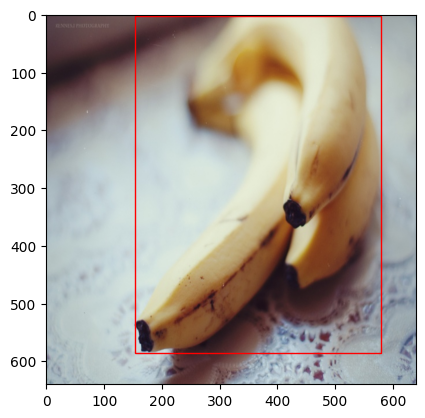

x1: 154, y1: 1, x2: 580, y2: 586


In [41]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Caminho para a imagem
image_path = "../../Data/Arquivo-Final/Banana/1.jpg"

# Caminho para o arquivo de anotação YOLO correspondente
label_path = "../../Data/Arquivo-Final/Banana/1.txt"

# Lê a imagem
image = cv2.imread(image_path)

# Lê o conteúdo do arquivo de anotação YOLO
with open(label_path, "r") as label_file:
    content = label_file.readline().split()

# Converte as coordenadas do bounding box do formato YOLO para coordenadas da imagem
classe, x_center, y_center, width, height = map(float, content[0:5])

x1 = int((x_center - width / 2) * image.shape[1])
y1 = int((y_center - height / 2) * image.shape[0])
x2 = int((x_center + width / 2) * image.shape[1])
y2 = int((y_center + height / 2) * image.shape[0])

# Desenha o bounding box na imagem
fig, ax = plt.subplots(1)
ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

plt.show()
print(f"x1: {x1}, y1: {y1}, x2: {x2}, y2: {y2}")